# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Randy Abdul Rahman
- **Email:** randyabdulrahman87@gmail.com
- **ID Dicoding:** randy-ar

## Menentukan Pertanyaan Bisnis

### Pertanyaan 1
- Apakah terdapat perbedaan signifikan dalam tingkat peminjaman sepeda pada hari libur dibandingkan dengan hari biasa?
- Bagaimana pola peminjaman berubah pada akhir pekan dibandingkan dengan hari kerja?

### Pertanyaan 2
- Bagaimana distribusi peminjaman sepeda pada berbagai jam dalam sehari?
- Apakah terdapat pola tertentu pada jam-jam sibuk atau sepi?

### Pertanyaan 3
- Bagaimana pola peminjaman sepeda berubah antara musim dan apakah faktor cuaca memiliki dampak yang berbeda pada setiap musim?
- Apakah ada tren yang mencolok pada musim tertentu yang dapat dihubungkan dengan faktor cuaca?

### Pertanyaan 4
- Bagaimana perbandingan antara jumlah peminjaman sepeda casual dan terdaftar?
- Apakah ada perbedaan pola peminjaman antara pengguna casual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [5]:
data_day = pd.read_csv('data/day.csv')
data_hour = pd.read_csv('data/hour.csv')
display(data_day)
display(data_hour)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [6]:
data_day.isnull().sum()
data_hour.isnull().sum()

data_day.dtypes

# Konversi kolom 'dteday' ke tipe data datetime
data_day['dteday'] = pd.to_datetime(data_day['dteday'])

display(data_day)
display(data_hour)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Cleaning Data

In [7]:
display(data_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
# Pertanyaan ke 1 Agregasi data per hari
daily_use = data_day.groupby(['workingday'])['cnt'].sum()
daily_use_weekday = data_day.groupby('workingday')['cnt'].apply(list).reset_index(name='cnt_list')
display(daily_use)
display(daily_use_weekday)

# Pertanyaan ke 2 data per jam
hourly_use = data_hour.groupby(['hr'])['cnt'].sum()
hourly_use_list = data_hour.groupby('hr')['cnt'].apply(list).reset_index(name='cnt_list')
hourly_use_list.reset_index(inplace=True, drop=True)
display(hourly_use_list)

# Pertanyaan ke 4 data users
correlation_matrix_users = data_day[['registered', 'casual', 'cnt']].corr()
print(correlation_matrix_users)
# Menghitung total peminjaman untuk setiap jenis pengguna
total_casual = data_day['casual'].sum()
total_registered = data_day['registered'].sum()

#pertanyaan ke 3
display(data_day)
# Membuat mapping untuk weathersit
weather_mapping = {1: 'Clear/Few clouds',
                   2: 'Mist/Cloudy',
                   3: 'Light Snow/Light Rain',
                   4: 'Heavy Rain/Ice Pallets'}

# Mengganti nilai weathersit dengan deskripsi yang sesuai
data_day_weathersit = data_day.copy()
data_day_weathersit['weathersit'] = data_day['weathersit'].map(weather_mapping)
# Membuat kolom baru berdasarkan weathersit
data_day['is_clear'] = (data_day['weathersit'] == 1).astype(int)
data_day['is_mist'] = (data_day['weathersit'] == 2).astype(int)
data_day['is_light_snow'] = (data_day['weathersit'] == 3).astype(int)
data_day['is_heavy_rain'] = (data_day['weathersit'] == 4).astype(int)

# Melihat korelasi antara kolom baru dan 'cnt'
correlation_new_columns = data_day[['is_clear', 'is_mist', 'is_light_snow', 'is_heavy_rain', 'cnt']].corr()

print("Korelasi antara kolom baru dan 'cnt':")
print(correlation_new_columns)

# Menghapus kolom 'is_heavy_rain' dari DataFrame correlation_new_columns
correlation_new_columns.drop('is_heavy_rain', axis=1, inplace=True)
correlation_new_columns.drop('is_heavy_rain', axis=0, inplace=True)
print("Korelasi antara kolom baru (setelah menghapus 'is_heavy_rain') dan 'cnt':")
print(correlation_new_columns)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

,workingday,cnt_list
0,0,"[985, 801, 959, 822, 1248, 1204, 1000, 981, 98..."
1,1,"[1349, 1562, 1600, 1606, 1510, 1321, 1263, 116..."


,hr,cnt_list
0,0,"[16, 17, 5, 5, 6, 11, 17, 25, 25, 5, 12, 7, 7,..."
1,1,"[40, 17, 2, 2, 6, 4, 7, 16, 12, 1, 3, 6, 2, 5,..."
2,2,"[32, 9, 1, 2, 2, 1, 16, 11, 3, 3, 1, 2, 1, 12,..."
3,3,"[13, 6, 7, 4, 1, 3, 1, 8, 15, 2, 1, 1, 7, 5, 1..."
4,4,"[1, 3, 1, 2, 2, 1, 1, 1, 1, 3, 4, 5, 1, 3, 2, ..."
5,5,"[1, 3, 4, 3, 4, 5, 5, 1, 3, 6, 5, 3, 8, 1, 2, ..."
6,6,"[2, 2, 30, 36, 33, 36, 34, 2, 1, 31, 27, 16, 2..."
7,7,"[3, 1, 64, 94, 88, 95, 84, 9, 6, 77, 99, 54, 7..."
8,8,"[8, 8, 154, 179, 195, 219, 210, 15, 10, 188, 2..."
9,9,"[14, 20, 88, 100, 115, 122, 134, 20, 19, 94, 1..."


            registered    casual       cnt
registered    1.000000  0.395282  0.945517
casual        0.395282  1.000000  0.672804
cnt           0.945517  0.672804  1.000000


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_clear,is_mist,is_light_snow,is_heavy_rain
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,1,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,1,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0,1,0,0
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0,1,0,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0,1,0,0
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1,0,0,0


Korelasi antara kolom baru dan 'cnt':
               is_clear   is_mist  is_light_snow  is_heavy_rain       cnt
is_clear       1.000000 -0.938964      -0.226050            NaN  0.252870
is_mist       -0.938964  1.000000      -0.122859            NaN -0.172879
is_light_snow -0.226050 -0.122859       1.000000            NaN -0.239958
is_heavy_rain       NaN       NaN            NaN            NaN       NaN
cnt            0.252870 -0.172879      -0.239958            NaN  1.000000
Korelasi antara kolom baru (setelah menghapus 'is_heavy_rain') dan 'cnt':
               is_clear   is_mist  is_light_snow       cnt
is_clear       1.000000 -0.938964      -0.226050  0.252870
is_mist       -0.938964  1.000000      -0.122859 -0.172879
is_light_snow -0.226050 -0.122859       1.000000 -0.239958
cnt            0.252870 -0.172879      -0.239958  1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

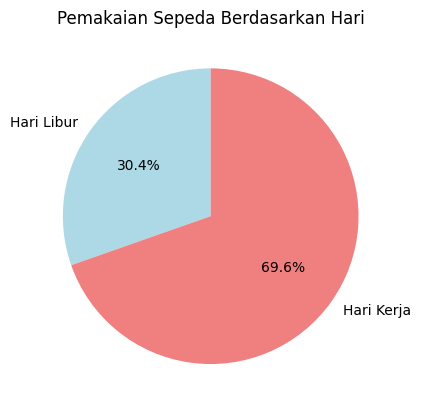

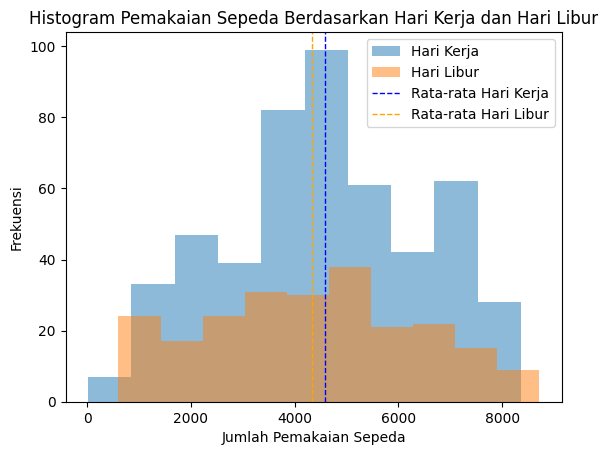

In [9]:
labels = ['Hari Libur', 'Hari Kerja']
# Membuat pie chart
plt.pie(daily_use, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
# Menambahkan judul
plt.title('Pemakaian Sepeda Berdasarkan Hari')
# Menampilkan pie chart
plt.show()

# jumlah pemakaian sepeda per hari
pemakaian_sepeda = {
    'Hari Kerja': daily_use_weekday.at[1, 'cnt_list'],
    'Hari Libur': daily_use_weekday.at[0, 'cnt_list']
}

# Menghitung rata-rata pemakaian sepeda per hari
rata_rata_hari_kerja = np.mean(pemakaian_sepeda['Hari Kerja'])
rata_rata_hari_libur = np.mean(pemakaian_sepeda['Hari Libur'])

# Membuat histogram
plt.hist(pemakaian_sepeda['Hari Kerja'], alpha=0.5, label='Hari Kerja')
plt.hist(pemakaian_sepeda['Hari Libur'], alpha=0.5, label='Hari Libur')

# Menambahkan garis rata-rata
plt.axvline(rata_rata_hari_kerja, color='blue', linestyle='dashed', linewidth=1, label='Rata-rata Hari Kerja')
plt.axvline(rata_rata_hari_libur, color='orange', linestyle='dashed', linewidth=1, label='Rata-rata Hari Libur')

# Menambahkan label dan judul
plt.xlabel('Jumlah Pemakaian Sepeda')
plt.ylabel('Frekuensi')
plt.title('Histogram Pemakaian Sepeda Berdasarkan Hari Kerja dan Hari Libur')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


### Pertanyaan 2:

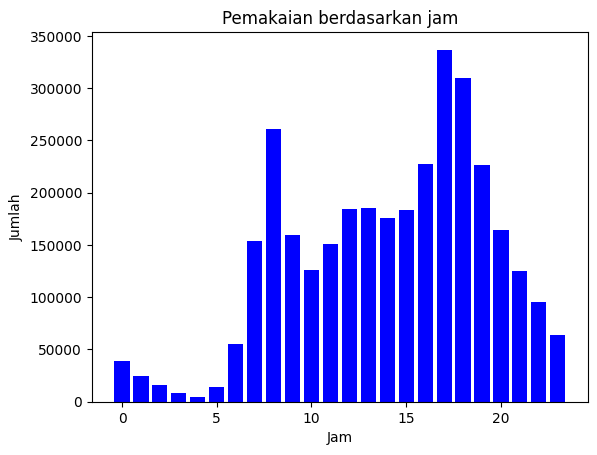

<Axes: >

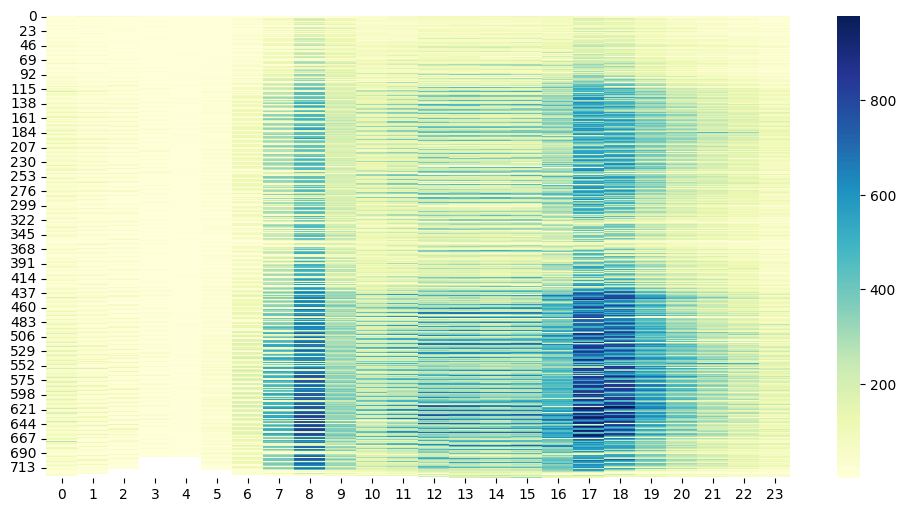

In [10]:
categories_hourly_use = [i for i in range(0, 24)]
values_hourly_use = [value for value in hourly_use]
plt.bar(categories_hourly_use, values_hourly_use, color='blue')
# Add labels and title
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Pemakaian berdasarkan jam')
plt.show()


# Menggabungkan list 'cnt_list' menjadi DataFrame
cnt_df = pd.concat([pd.Series(row['cnt_list'], name=row['hr']) for _, row in hourly_use_list.iterrows()], axis=1)

# Mengonversi DataFrame ke dalam format array numpy
data_array = cnt_df.values

# Membuat heatmap untuk melihat pola pemakaian sepeda tiap jamnya
plt.figure(figsize=(12, 6))
sns.heatmap(data_array, cmap='YlGnBu')


### Pertanyaan 3:

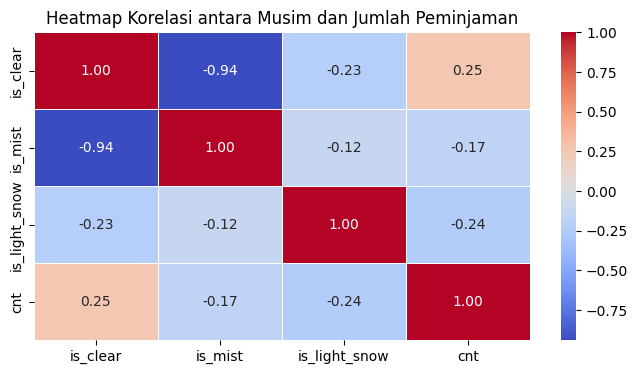

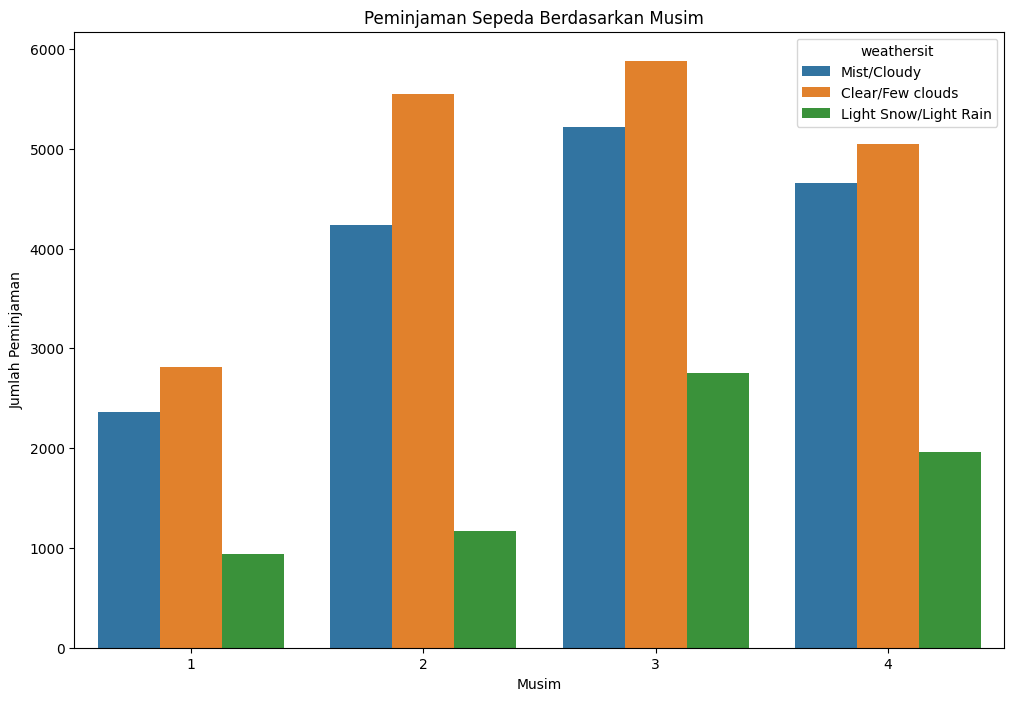

In [11]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_new_columns, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi antara Musim dan Jumlah Peminjaman')
plt.show()

# Membuat plot menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='cnt', hue='weathersit', data=data_day_weathersit, errorbar=None)
plt.title('Peminjaman Sepeda Berdasarkan Musim  ')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Pertanyaan 4:

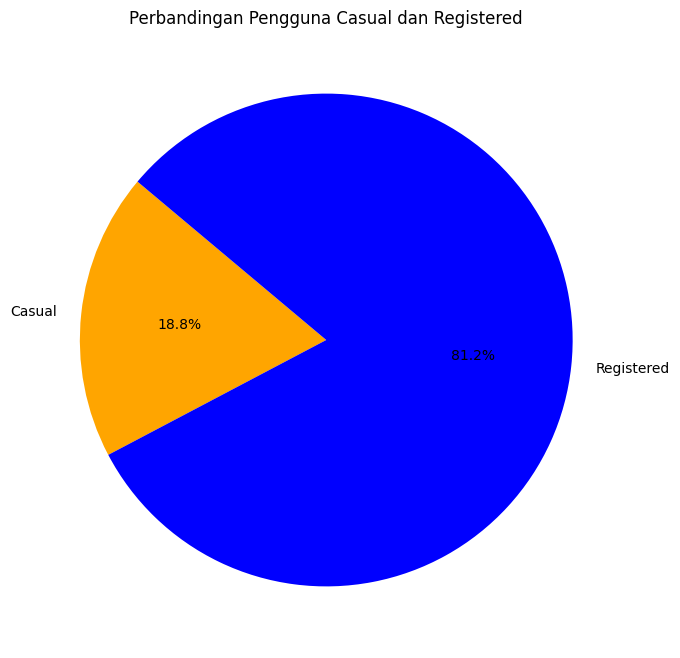

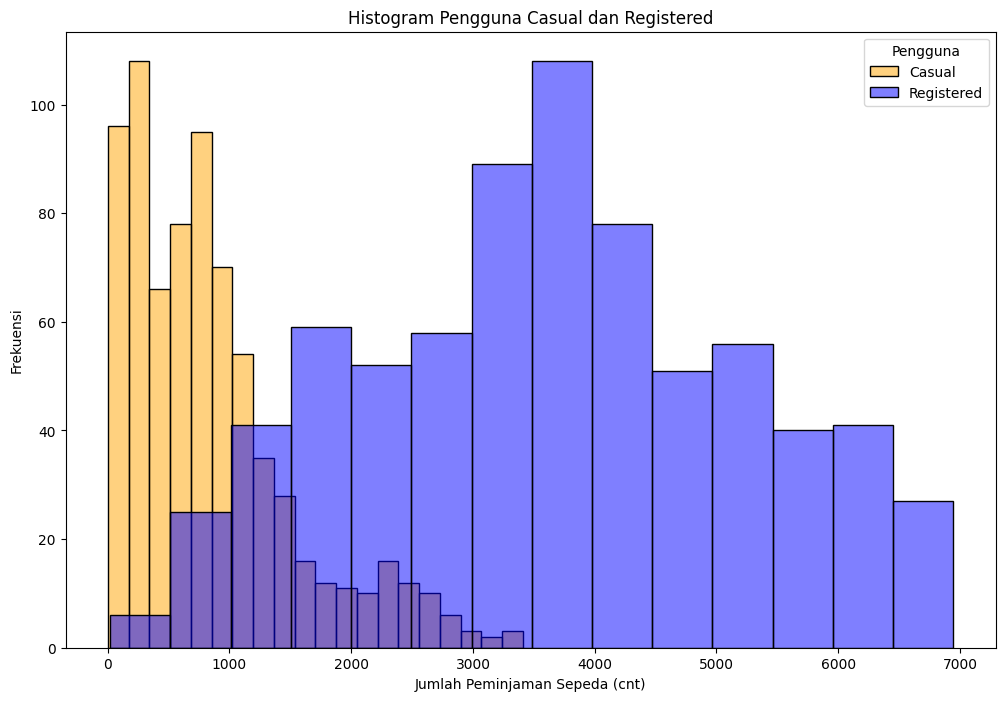

In [12]:
plt.figure(figsize=(8, 8))
# Menyiapkan data untuk pie chart
sizes = [total_casual, total_registered]
labels = ['Casual', 'Registered']
colors = ['orange', 'blue']
# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Pengguna Casual dan Registered')
plt.show()


# Misalkan data adalah DataFrame yang berisi 'casual', 'registered', dan 'cnt'
plt.figure(figsize=(12, 8))
# Membuat histogram untuk pengguna casual
sns.histplot(data_day['casual'], alpha=0.5, color='orange', kde=False, label='Casual')
# Membuat histogram untuk pengguna registered
sns.histplot(data_day['registered'], alpha=0.5, color='blue', kde=False, label='Registered')
plt.xlabel('Jumlah Peminjaman Sepeda (cnt)')
plt.ylabel('Frekuensi')
plt.title('Histogram Pengguna Casual dan Registered')
plt.legend(title='Pengguna', loc='upper right')
plt.show()

## Conclusion

### Pertanyaan 1
1. Apakah terdapat perbedaan signifikan dalam tingkat peminjaman sepeda pada hari libur dibandingkan dengan hari biasa?
- Dari pie chart kita dapat melihat terdapat perbedaan yang sangat signifikan dari peminjaman sepeda pada hari libur dan hari kerja. Terhitung dari 2011 hingga 2012 terdapat 30% peminjaman sepeda pada hari libur dan 70% peminjaman sepeda dihari kerja.

2. Bagaimana pola peminjaman berubah pada akhir pekan dibandingkan dengan hari kerja?
- Dari grafik histogram dapat terlihat perbedaan frekuensi peminjaman sepeda antara hari ibur, dan peminjaman sepeda dihari kerja

### Pertanyaan 2
1. Bagaimana distribusi peminjaman sepeda pada berbagai jam dalam sehari?
- Jumlah peminjaman sepeda tiap jam dapat dilihat pada grafik bar Pemakaian berdasarkan jam. pada grafik tersebut terlihat peminjaman sepeda banyak terjadi pada jam kerja dimulai yaitu pukul 8 pagi, dan banyak terjadi pada jam pulang kerja yaitu pukul 17 dan 18 sore.

2. Apakah terdapat pola tertentu pada jam-jam sibuk atau sepi?
- Dari grafik heatmap pola peminjaman terlihat sibuk pada pukul 8 pagi dan 17 sampai 18 sore. 
Dari grafik ini juga terlihat pada tahun 2011 minat peminjaman sepeda kurang banyak, namun pada tahun 2012
minat peminjaman sepeda lebih banyak.

### Pertanyaan 3
1. Bagaimana pola peminjaman sepeda berubah antara musim dan apakah faktor cuaca memiliki dampak yang berbeda pada setiap musim?
- Pengaruh musim pada peminjaman sepeda dapat dilihat pada grafik Heatmap Korelasi antara Musim dan Jumlah Peminjaman pada musim yang cerah terdapat penaruh positif pada peminjaman sepeda sebesar 0.25, pada musim berkabut memiliki pengaruh negatif sebesar 0.17 pada peminjaman sepeda, dan pada musim bersalju memiliki pengaruh negatif pada peminjaman sepeda sebesar 0.24. Pola peminjaman sepeda dapat dilihat pada grafik Peminjaman Sepeda Berdasarkan Musim. Dari grafik bar tersebut kita dapat melihat peminjaman sepeda lebih banyak dilakukan pada musim yang cerah dan berkabut. Pada musim salju peminjaman sepeda turun drastis.

2. Apakah ada tren yang mencolok pada musim tertentu yang dapat dihubungkan dengan faktor cuaca?
- Tren mencolok dapat dilihat pada grafik Peminjaman Sepeda Berdasarkan Musim. Pada grafik tersebut dapat dilihat musim salju memiliki tren peminjaman yang turun dan pada musim yang cerah memiliki tren peminjaman yang naik. Faktor cuaca sangat berpengaruh pada peminjaman sepeda.

3. Apakah informasi ini berguna untuk bisnis peminjaman sepeda ini? 
- Informasi ini sangat berguna untuk pengambilan keputusan bisnis. Kegiatan pemasaran sebaiknya dilaksanakan pada musim yang cerah dan berkabut, karena minat bersepeda masyarakat sangat tinggi pada kedua musim tersebut.

### Pertanyaan 4
1. Bagaimana perbandingan antara jumlah peminjaman sepeda casual dan terdaftar?
- Perbandingan pengguna sepeda dapat dilihat pada pie chart Perbandingan Pengguna Casual dan Registered. Pada grafik  tersebut dapat terlihat perbandingan besar antara pengguna kasual dan pengguna yang telah terdaftar, sebanyak 19% total peminjaman berasal dari pengguna kasual dan 81% berasal dari pengguna yang telah terdaftar.

2. Apakah ada perbedaan pola peminjaman antara pengguna casual dan terdaftar?
- Perbedaan pola peminjaman dapat dilihat dari grafik Histogram Pengguna Casual dan Registered. Pada grafik tersebut pengguna kasual cenderung sedikit namun frekuensi peminjaman sering. Sedangkan pengguna yang telah terdaftar cenderung banyak dan frekuensi peminjamannya sering.


In [13]:
data_day.to_csv("dashboard/data_day.csv")
data_hour.to_csv("dashboard/data_hour.csv")